In [1]:
import math

import numpy as np
from PIL import Image
from skimage import color, io

from matplotlib import pyplot as plt

In [2]:
def load(image_path):
    """Loads an image from a file path.

    HINT: Look up `skimage.io.imread()` function.

    Args:
        image_path: file path to the image.

    Returns:
        out: numpy array of shape(image_height, image_width, 3).
    """
    out = None

    try:
        out = io.imread(image_path)
    except Exception as e:
        print(e)
        return None

    # Let's convert the image to be between the correct range.
    out = out.astype(np.float64) / 255
    return out

In [3]:
img_path = "/content/image1.jpg"
img = load(img_path)
img.shape

(300, 300, 3)

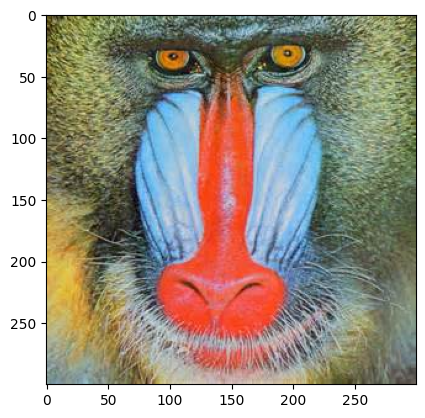

In [4]:
plt.imshow(img)

In [5]:
def crop_image(image, start_row, start_col, num_rows, num_cols):
    """Crop an image based on the specified bounds.

    Args:
        image: numpy array of shape(image_height, image_width, 3).
        start_row (int): The starting row index we want to include in our cropped image.
        start_col (int): The starting column index we want to include in our cropped image.
        num_rows (int): Number of rows in our desired cropped image.
        num_cols (int): Number of columns in our desired cropped image.

    Returns:
        out: numpy array of shape(num_rows, num_cols, 3).
    """
    out = image[start_row : start_row + num_rows, start_col : start_col + num_cols]

    return out

In [6]:
img_crop = crop_image(img, 100, 100, 600, 800)
img_crop.shape

(200, 200, 3)

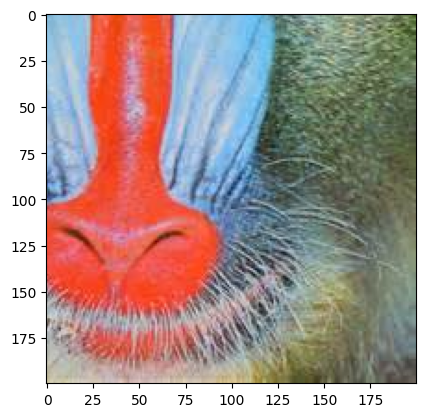

In [7]:
plt.imshow(img_crop)

In [8]:
def dim_image(image):
    """Change the value of every pixel by following

                        x_n = 0.5*x_p^2

    where x_n is the new value and x_p is the original value.

    Args:
        image: numpy array of shape(image_height, image_width, 3).

    Returns:
        out: numpy array of shape(image_height, image_width, 3).
    """

    out = 0.5 * np.square(image)

    return out

In [9]:
img_dim = dim_image(img)
img_dim.shape

(300, 300, 3)

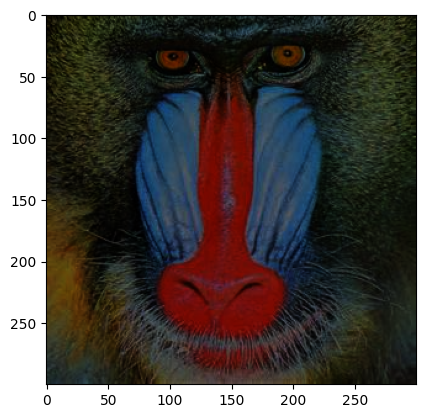

In [10]:
plt.imshow(img_dim)

In [11]:
def resize_image(input_image, output_rows, output_cols):
    """Resize an image using the nearest neighbor method.

    Args:
        input_image (np.ndarray): RGB image stored as an array, with shape
            `(input_rows, input_cols, 3)`.
        output_rows (int): Number of rows in our desired output image.
        output_cols (int): Number of columns in our desired output image.

    Returns:
        np.ndarray: Resized image, with shape `(output_rows, output_cols, 3)`.
    """
    input_rows, input_cols, channels = input_image.shape
    assert channels == 3

    # 1. Create the resized output image
    output_image = np.zeros(shape=(output_rows, output_cols, 3))

    # 2. Populate the `output_image` array using values from `input_image`
    #    > This should require two nested for loops!

    for i in range(output_rows):
        for j in range(output_cols):
            input_row = math.floor((i / output_rows) * input_rows)
            input_col = math.floor((j / output_cols) * input_cols)
            output_image[i, j] = input_image[input_row, input_col]

    # 3. Return the output image
    return output_image

In [12]:
img_resize = resize_image(img, 500, 500)
img_resize.shape

(500, 500, 3)

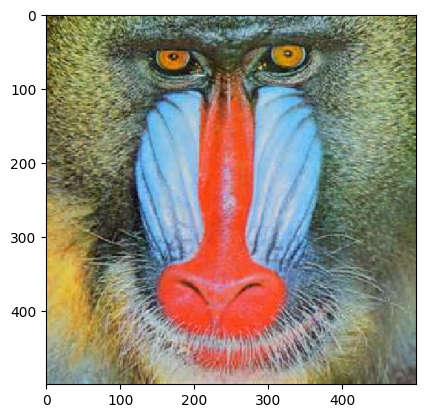

In [13]:
plt.imshow(img_resize)

In [ ]:
def rotate2d(point, theta):
    """Rotate a 2D coordinate by some angle theta.

    Args:
        point (np.ndarray): A 1D NumPy array containing two values: an x and y coordinate.
        theta (float): An theta to rotate by, in radians.

    Returns:
        np.ndarray: A 1D NumPy array containing your rotated x and y values.
    """
    assert point.shape == (2,)
    assert isinstance(theta, float)

    x, y = point
    x_rot = x * np.cos(theta) - y * np.sin(theta)
    y_rot = x * np.sin(theta) + y * np.cos(theta)

    return np.array([x_rot, y_rot])

In [ ]:
def rotate_image(input_image, theta):
    """Rotate an image by some angle theta.

    Args:
        input_image (np.ndarray): RGB image stored as an array, with shape
            `(input_rows, input_cols, 3)`.
        theta (float): Angle to rotate our image by, in radians.

    Returns:
        (np.ndarray): Rotated image, with the same shape as the input.
    """
    input_rows, input_cols, channels = input_image.shape
    assert channels == 3

    # 1. Create an empty output image with the same shape
    output_image = np.zeros_like(input_image)

    # 2. Compute the center of the image (we rotate around the center)
    center_y = input_rows / 2
    center_x = input_cols / 2

    # 3. Loop through each pixel in the output image
    for i in range(input_rows):
        for j in range(input_cols):
            # Convert (i, j) to (x, y) relative to image center
            y = i - center_y
            x = j - center_x

            # Apply inverse rotation to find the corresponding source position
            x_in, y_in = rotate2d(np.array([x, y]), -theta)

            # Convert back to image coordinates
            input_i = int(round(y_in + center_y))
            input_j = int(round(x_in + center_x))

            # If the mapped input position is within image bounds, copy pixel
            if 0 <= input_i < input_rows and 0 <= input_j < input_cols:
                output_image[i, j] = input_image[input_i, input_j]

    return output_image

In [16]:
img_rotate = rotate_image(img, np.pi / 4)
img_rotate.shape

(300, 300, 3)

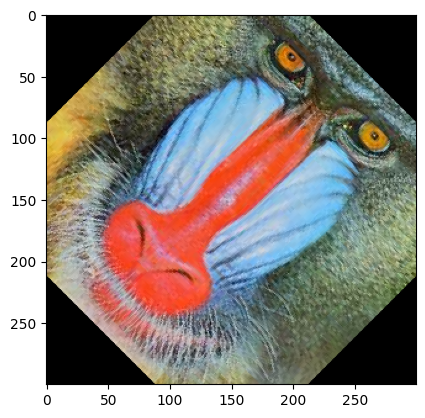

In [17]:
plt.imshow(img_rotate)